# Support Vector Machines

## Daniel Wilcox: 19147414

This example problem can be found within chapter 5 of the "Hands-on Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron. 

This project will be investigating the theory behind support vector machines and how to implament them.

In [1]:
#General imports for operating system, unzip and URL's
import os
from six.moves import urllib
from scipy.io import loadmat
from sklearn.datasets import fetch_mldata
import pickle

#Graphics
import matplotlib
import matplotlib.pyplot as plt

#Array Manipulation
import numpy as np

#Shuffles data to test/train sets that represent the original data
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.datasets import make_moons
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR


In [2]:
def notify(title, text):
    os.system("""
              osascript -e 'display notification "{}" with title "{}"'
              """.format(text, title))
    os.system('osascript -e "beep 1"')
    
#notify("Python: Chapter 5", "Classifier is complete")

In [3]:
#The Location to save the models
PICKLE_PATH = "PickleModels/Chap5"

In [4]:
#Pickle functions


def save_pickle(model_name, model, pic_path=PICKLE_PATH):
    print("Saving model...")
    
    cwd = os.getcwd()
    os.chdir(cwd+"/"+pic_path)
        
    f = open(model_name, "wb")
    pickle.dump(model, f)
    f.close()
    
    os.chdir(cwd)
    print("Saved "+model_name+" successfully!\n")
    return None
    
    

def load_pickle(model_name, pic_path=PICKLE_PATH):
    print("Loading "+model_name+" from Pickle file...")
    
    cwd = os.getcwd()
    os.chdir(cwd+"/"+pic_path)
    
    f = open(model_name, "rb")
    p = pickle.load(f)
    f.close()
    
    os.chdir(cwd)
    print(model_name+" successfully loaded!\n")
    return p

def pickle_exist(model_name, pic_path=PICKLE_PATH):
    #check if pickle file exists
    print("Checking if pickle directory exists...")
    if not os.path.isdir(pic_path):
        os.makedirs(pic_path)
        print("Directory does NOT exists")
        print("Creating directory")
    
    else: 
        print("Directory exists")
        
    if os.path.isfile(pic_path+"/"+model_name):
        print("Pickle file does exists...")
        return True
    else:
        print("Pickle file does NOT exists...")
        return False
    
    

#SAVING FILES WITH PICKLE
#save_clf = open("name_clf.pickle","wb")
#   save_clf: name of file variable (info on file created)
#   open("name_clf.pickle","wb"): open file named "name_clf.pickle" (.pickle extension)
#      "wb": write in bytes

#pickle.dump(clf_want, save_clf)
#   pickle.dump: dump contents of clf_want into file save_clf

#save_clf.close()
#   close the file

#--------------------------------------------------------------

#OPENING FILES WITH PICKLE
#clf_file_want = open("name_clf.pickle","rb")
#   clf_file_want: name of file variable (file is stored in here)
#   open("name_clf.pickle","rb"): open the contents of "name_clf.pickle"
#   "rb": read in bytes


#clf_load_in = pickle.load(clf_file_want)
#   clf_load_in: name of new classifier 
#   pickle.load(clf_file_want): load contents of file variable into classifier's variable


#clf_load_in.close()
#   close the file





# Exercises
1. What is the fundamental idea behind Support Vector Machines?
2. What is a support vector?
3. Why is it important to scale the inputs when using SVMs?
4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?
5. Should you use the primal or the dual form of the SVM problem to train a model on a training set with millions of instances and hundreds of features?
6. Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease γ (gamma)? What about C?
7. How should you set the QP parameters (H, f, A, and b) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?


8. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


In [5]:
iris = datasets.load_iris()

#Petal length and Petal width
X = iris["data"][:, (2, 3)]

#labels for all Iris-...
y = iris["target"]

#Index's for iris-Setosa(0) and iris-Versicolor(1)
index = (y == 0) | (y == 1)

#new X and y (only iris-Versicolor and iris-Setosa)
X_new = X[index]
y_new = y[index]

ind_set = (y_new == 0)
ind_ver = (y_new == 1)

X_set = X_new[ind_set]
X_ver = X_new[ind_ver]


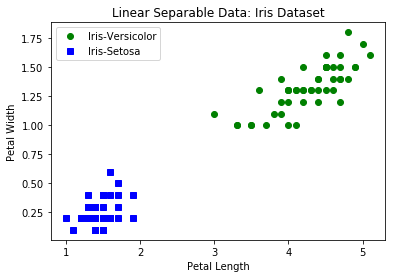

In [6]:
plt.plot(X_ver[:, 0], X_ver[:, 1], "go", label="Iris-Versicolor")
plt.plot(X_set[:, 0], X_set[:, 1], "bs", label="Iris-Setosa")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Linear Separable Data: Iris Dataset")
plt.legend(loc='upper left')
plt.show()

In [7]:
C = 1
m = len(X_new)

#Scale data
scale = StandardScaler()
X_scaled = scale.fit_transform(X_new)

#To create new model if pickle already even if pickle exists; load_pickle = False
load_pickle = False

    
#Linear Support Vector Classifier
if pickle_exist("lin_clf") and load_pickle:
    lin_clf = load_pickle("lin_clf")
else:
    lin_clf = LinearSVC(loss="hinge", C=C, 
                        random_state=42)
    lin_clf.fit(X_scaled, y_new)
    save_pickle("lin_clf", lin_clf)

#Support Vector Machine Classifier    
if pickle_exist("svc_clf") and load_pickle:
    svc_clf = load_pickle("svc_clf")
else:
    svc_clf = SVC(kernel="linear",  C=C)
    svc_clf.fit(X_scaled, y_new)
    save_pickle("svc_clf", svc_clf)

#Stochastic Gradient Descent Classifier    
if pickle_exist("sgd_clf") and load_pickle:
    sgd_clf = load_pickle("sgd_clf")
else:
    sgd_clf = SGDClassifier(
        loss="hinge", alpha=1/(m*C), random_state=42)
    sgd_clf.fit(X_scaled, y_new)
    save_pickle("sgd_clf", sgd_clf)


Checking if pickle directory exists...
Directory exists
Pickle file does exists...
Saving model...
Saved lin_clf successfully!

Checking if pickle directory exists...
Directory exists
Pickle file does exists...
Saving model...
Saved svc_clf successfully!

Checking if pickle directory exists...
Directory exists
Pickle file does exists...
Saving model...
Saved sgd_clf successfully!



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [8]:
point = [3, 1]
ans1 = lin_clf.predict([point])
ans2 = svc_clf.predict([point])
ans3 = sgd_clf.predict([point])

print("Classifiers predictions for the point: {}, {}".format(point[0], point[1]))
print("Linear Classifier:\t", ans1)
print("SVM Classifier:\t\t", ans2)
print("SGD Classifier:\t\t", ans3)

Classifiers predictions for the point: 3, 1
Linear Classifier:	 [1]
SVM Classifier:		 [1]
SGD Classifier:		 [1]


In [9]:
print("\t\t\t   Intercept   |      Coefficients")
print("---------------------------------------|-----------------------------")
print("Linear Classifier:\t", lin_clf.intercept_,"|", lin_clf.coef_)
print("SVM Classifier:\t\t", svc_clf.intercept_,"|", svc_clf.coef_)
print("SGD Classifier:\t\t", sgd_clf.intercept_,"|", sgd_clf.coef_)

			   Intercept   |      Coefficients
---------------------------------------|-----------------------------
Linear Classifier:	 [0.29588877] | [[1.0607458  1.00177835]]
SVM Classifier:		 [0.32182521] | [[1.04342638 0.94747825]]
SGD Classifier:		 [0.32737966] | [[1.2072264 1.0771503]]


In [10]:
#Equation:    (w^t).x + b = y_hat
#On the line: w0*x0 + w1*x1 + b = 0
#To get y = mx + c, let x1 = y, and x0 = x

#Thus: x1 = -w0/w1 * x0 - b/w1
#       y = (m     * x)  +  c

lin_m = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
lin_c = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]

svc_m = -svc_clf.coef_[0, 0]/svc_clf.coef_[0, 1]
svc_c = -svc_clf.intercept_[0]/svc_clf.coef_[0, 1]

sgd_m = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
sgd_c = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]   

In [11]:
x_line = [-6, 6]

# Transform back to original scale: 
lin_line = scale.inverse_transform([[x_line[0], x_line[0] * lin_m + lin_c],
                                    [x_line[1], x_line[1] * lin_m + lin_c]])

svc_line = scale.inverse_transform([[x_line[0], x_line[0] * svc_m + svc_c], 
                                    [x_line[1], x_line[1] * svc_m + svc_c]])

sgd_line = scale.inverse_transform([[x_line[0], x_line[0] * sgd_m + sgd_c], 
                                    [x_line[1], x_line[1] * sgd_m + sgd_c]])


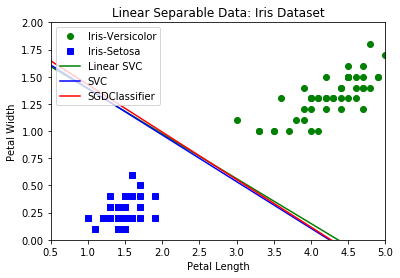

In [12]:
plt.plot(X_ver[:, 0], X_ver[:, 1], "go", label="Iris-Versicolor")
plt.plot(X_set[:, 0], X_set[:, 1], "bs", label="Iris-Setosa")

plt.plot(lin_line[:, 0], lin_line[:, 1], "g-", label="Linear SVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b-", label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Linear Separable Data: Iris Dataset")
plt.axis([0.5, 5, 0, 2])
plt.legend(loc='upper left')
plt.show()



9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [13]:
#The Location to save the dataset
MNIST_PATH = "datasets/MNIST"
MNIST_URL = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
MNIST_MAT = "/mnist-original.mat"

In [14]:
def load_MNIST_data(mnist_path=MNIST_PATH, mnist_mat=MNIST_MAT):
        mnist_raw = loadmat(mnist_path+mnist_mat)
        mnist = {"data": mnist_raw["data"].T,
                 "target": mnist_raw["label"][0],
                 "Col_names": ["target", "data"],
                 "DESCR": "mldata.org dataset: mnist-original",
                }
        print("Data Successfully extracted from mnist.mat!")
        return mnist
        
    
def get_MNIST_data(mnist_path=MNIST_PATH, mnist_url=MNIST_URL, mnist_mat=MNIST_MAT):
    
    print("Checking if directory exists...")
    if not os.path.isdir(mnist_path):
        os.makedirs(mnist_path)
        print("Creating directory")
    
    else: 
        print("Directory exists")
        
        #------------------------------------------------------------------
        #uncomment if connected to internet
        #try:
            #print("\nAttempting to get MNIST data from mldata.org ...")
            #mnist = fetch_mldata('MNIST original')
            #print("\nSuccess!")
            #return mnist
    
        #except urllib.error.HTTPError as ex:
            #print("\nCan't reach mldata.org, attempting alternative...")
            #print("Checking if mnist.mat file exists...")  
            
        #------------------------------------------------------------------
        #followig if, else should fall under 'except' 
            
        if os.path.isfile(mnist_path+mnist_mat):
            print("mnist.mat file does exists...")
            print("extracting data from mnist.mat...")
            
            mnist = load_MNIST_data(mnist_path, mnist_mat)
            print("\nSuccess!")
            return mnist
        
        else:
            print("mnist.mat file doesn't exists...")
            print("downloading mnist.mat file...")
            url_response = urllib.request.urlopen(mnist_url)
            
            print("\nCreating .mat file")
            with open(mnist_path+mnist_mat, "wb") as f:
                contents = url_response.read()
                f.write(contents)
            mnist = load_MNIST_data(mnist_path, mnist_mat)
            print("\nSuccess!")
            return mnist

In [15]:
mnist = get_MNIST_data(MNIST_PATH, MNIST_URL, MNIST_MAT)
mnist    

Checking if directory exists...
Directory exists
mnist.mat file does exists...
extracting data from mnist.mat...
Data Successfully extracted from mnist.mat!

Success!


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'Col_names': ['target', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [16]:
X, y = mnist["data"], mnist["target"]
print("Shape of \"Data\": {}\nShape of \"target\": {}\n".format(X.shape,y.shape))

Shape of "Data": (70000, 784)
Shape of "target": (70000,)



In [17]:
#MNIST is already split into train and test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


#Shuffle training set to guarentee cross-validation folds are similar.
np.random.seed(42)
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [18]:
#Linear SVM Classifier  
if pickle_exist("lin_clf_mnist") and load_pickle:
    lin_clf_mnist = load_pickle("lin_clf_mnist")
else:
    lin_clf_mnist = LinearSVC(random_state=42)    
    lin_clf_mnist.fit(X_train, y_train)
    save_pickle("lin_clf_mnist", lin_clf_mnist)
    
y_pred_lin = lin_clf_mnist.predict(X_train)
acc_1 = accuracy_score(y_train, y_pred_lin)

#notify("Python: Chapter 5", "lin_clf_mnist is complete")

print("Accuracy score of linear SVC: {}%".format(acc_1*100))

Checking if pickle directory exists...
Directory exists
Pickle file does exists...


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Saving model...
Saved lin_clf_mnist successfully!

Accuracy score of linear SVC: 84.38666666666667%


In [19]:
#Scale Data
X_train_scale = scale.fit_transform((X_train.astype(np.float32)))
X_test_scale = scale.fit_transform((X_test.astype(np.float32)))

In [20]:
#Linear SVM Classifier  (Scaled) 
if pickle_exist("lin_clf_mnist_sc") and load_pickle:
    lin_clf_mnist_sc = load_pickle("lin_clf_mnist_sc")
else:
    lin_clf_mnist_sc = LinearSVC(random_state=42)    
    lin_clf_mnist_sc.fit(X_train_scale, y_train)
    save_pickle("lin_clf_mnist_sc", lin_clf_mnist_sc)
    
y_pred_lin_sc = lin_clf_mnist_sc.predict(X_train_scale)
acc_2 = accuracy_score(y_train, y_pred_lin_sc)

#notify("Python: Chapter 5", "y_pred_lin_sc is complete")

print("Accuracy score of scaled linear SVC: {}%".format(acc_2*100))

Checking if pickle directory exists...
Directory exists
Pickle file does exists...


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Saving model...
Saved lin_clf_mnist_sc successfully!

Accuracy score of scaled linear SVC: 92.19333333333334%


In [21]:
print("Number of entries in \"X_train_scale\": {}\n".format(len(X_train_scale)))

#Fraction of training data
frac = 1/6
ind_frac = int(len(X_train_scale)*frac)
print("Reduced number of entries in \"X_train_scale\": {}\n".format(len(X_train_scale[:ind_frac])))

Number of entries in "X_train_scale": 60000

Reduced number of entries in "X_train_scale": 10000



In [22]:
#One-Vs-Rest Classifier   
if pickle_exist("ovr_clf") and load_pickle:
    ovr_clf = load_pickle("ovr_clf")
else:
    ovr_clf = SVC(decision_function_shape="ovr", gamma="auto")
    ovr_clf.fit(X_train_scale[:ind_frac], y_train[:ind_frac])
    save_pickle("ovr_clf", ovr_clf)

y_pred_ovr = ovr_clf.predict(X_train_scale[:ind_frac])
acc_3 = accuracy_score(y_train[:ind_frac], y_pred_ovr)

#notify("Python: Chapter 5", "ovr_clf is complete")    


print("Accuracy score of One-Vs-Rest Classifier: {}%".format(acc_3*100))

Checking if pickle directory exists...
Directory exists
Pickle file does exists...
Saving model...
Saved ovr_clf successfully!

Accuracy score of One-Vs-Rest Classifier: 98.09%


In [23]:
param_distributions = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(1, 10)
}

rand_search = RandomizedSearchCV(ovr_clf, param_distributions, 
                                 n_iter=100, verbose=2, cv=3, n_jobs=4)

rand_search.fit(X_train_scale[:(int(ind_frac/10))],
                y_train[:(int(ind_frac/10))])

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   53.4s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1b59d6d8>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1b56bc18>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [71]:
best_est = rand_search.best_estimator_
best_sco = rand_search.best_score_ 
text_check = os.path.isfile(PICKLE_PATH+"/best_rand_clf_score.txt")
    
if pickle_exist("best_rand_clf") and text_check and load_pickle:
    #load current best score
    prev_best_score = max(np.loadtxt('best_rand_clf_score.txt', dtype=float))

    if best_sco > prev_best_score:
        temp = [best_sco, best_sco]
        np.savetxt('best_rand_clf_score.txt', temp, fmt='%f')
        save_pickle("best_rand_clf", rand_search)
    else:
        #load in better parameters
        best_sco = max(np.loadtxt('best_rand_clf_score.txt', dtype=float))
        rand_search = load_pickle("best_rand_clf")
else:
    #make pickles if dont exist
    temp = [best_sco, best_sco]
    np.savetxt('best_rand_clf_score.txt', temp, fmt='%f')
    save_pickle("best_rand_clf", rand_search)
    
    


Checking if pickle directory exists...
Directory exists
Pickle file does exists...
Saving model...
Saved best_rand_clf successfully!



In [72]:
print("Best score is: {}%\nBest Estimator:\n".format(best_sco*100), rand_search.best_estimator_)

Best score is: 89.55%
Best Estimator:
 SVC(C=9.268056464938748, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0013272405874306772,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [73]:
#rand_search.best_estimator_.fit(X_train_scale, y_train)

y_pred_rand_train = rand_search.best_estimator_.predict(X_train_scale)
acc_rand_train = accuracy_score(y_train, y_pred_rand_train)

print("Training: Accuracy score of Random One-Vs-Rest Classifier: {}%\n".format(acc_rand_train*100))

y_pred_rand_test = rand_search.best_estimator_.predict(X_test_scale)
acc_rand_test = accuracy_score(y_test, y_pred_rand_test)

print("Testing: Accuracy score of Random One-Vs-Rest Classifier: {}%".format(acc_rand_test*100))


Training: Accuracy score of Random One-Vs-Rest Classifier: 91.22333333333333%

Testing: Accuracy score of Random One-Vs-Rest Classifier: 91.06%


10. Train an SVM regressor on the California housing dataset.

In [74]:
Houses = fetch_california_housing()
X_H = Houses["data"]
y_H = Houses["target"]

In [75]:
#Split Data
X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_H, y_H, test_size=0.2, random_state=42)

#scale data
X_H_train_sc = scale.fit_transform(X_H_train)
X_H_test_sc = scale.transform(X_H_test)

In [76]:
#Linear SVR
if pickle_exist("lin_svr") and load_pickle:
    lin_svr = load_pickle("lin_svr")
else:
    lin_svr = LinearSVR(random_state=42)    
    lin_svr.fit(X_H_train_sc, y_H_train)
    save_pickle("lin_svr", lin_svr)
    
y_pred_svr_lin = lin_svr.predict(X_H_train_sc)
mse = mean_squared_error(y_H_train, y_pred_svr_lin)
print("Mean Square Error for Linear SVR: {}%".format(mse*100))
print("Root Mean Square Error for Linear SVR: {}%".format(np.sqrt(mse)*100))

Checking if pickle directory exists...
Directory exists
Pickle file does NOT exists...
Saving model...
Saved lin_svr successfully!

Mean Square Error for Linear SVR: 95.45170440733739%
Root Mean Square Error for Linear SVR: 9.76993881287582%


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [77]:
#Random SVR
param_distributions = {
    "gamma": reciprocal(0.001, 0.1), 
    "C": uniform(1, 10)
}


rand_SVR = RandomizedSearchCV(SVR(), param_distributions, n_iter=30, 
                              verbose=2, cv=3, random_state=42, n_jobs=4)
rand_SVR.fit(X_H_train_sc, y_H_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a244a2d68>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a244a2da0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [78]:
best_est_svr = rand_SVR.best_estimator_
best_sco_svr = rand_SVR.best_score_ 
    
if pickle_exist("best_rand_svr_score") or pickle_exist("best_rand_svr"):
    #load current best score
    prev_best_score = load_pickle("best_rand_svr_score")
    
    if best_sco_svr > prev_best_score:
        save_pickle("best_rand_svr_score", best_sco_svr)
        save_pickle("best_rand_svr", rand_SVR)
    else:
        #load in better parameters
        best_sco_svr = load_pickle("best_rand_svr_score")
        rand_SVR = load_pickle("best_rand_svr")
else:
    #make pickles if dont exist
    save_pickle("best_rand_svr_score", best_sco_svr)
    save_pickle("best_rand_svr", rand_SVR)
    

Checking if pickle directory exists...
Directory exists
Pickle file does NOT exists...
Checking if pickle directory exists...
Directory exists
Pickle file does NOT exists...
Saving model...
Saved best_rand_svr_score successfully!

Saving model...
Saved best_rand_svr successfully!



In [79]:
print("Best score is: {}%\nBest SVR Estimator:\n".format(best_sco_svr*100), rand_SVR.best_estimator_)

Best score is: 73.82549678673655%
Best SVR Estimator:
 SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


In [80]:
y_pred_rand_SVR = rand_SVR.best_estimator_.predict(X_H_train_sc)
mse_2 = mean_squared_error(y_H_train, y_pred_rand_SVR)

print("Training: RMSE for Random SVR: {}%".format(np.sqrt(mse_2)*100))

Training: RMSE for Random SVR: 5.727524770785359%


In [81]:
y_pred_rand_SVR_test = rand_SVR.best_estimator_.predict(X_H_test_sc)
mse_3 = mean_squared_error(y_H_test, y_pred_rand_SVR_test)

print("Testing: RMSE for Random SVR: {}%".format(np.sqrt(mse_3)*100))

Testing: RMSE for Random SVR: 5.929168385528733%


In [82]:
notify("Python: Chapter 5", "All is complete")